<a href="https://colab.research.google.com/github/Naima-ai/Codsoft/blob/main/creditcard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import re
from nltk.corpus import stopwords
import nltk
import seaborn as sns
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#store data
train_dt=pd.read_csv("/content/drive/MyDrive/archive (4)/fraudTrain.csv",encoding='latin-1')
test_dt=pd.read_csv("/content/drive/MyDrive/archive (4)/fraudTest.csv",encoding='latin-1')


In [ ]:
train_dt

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [ ]:
train_dt.shape
train_dt.info()
train_dt.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [ ]:
test_dt.shape
test_dt.info()
test_dt.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


No missing values. but different data types

In [ ]:
train_dt[["trans_date","trans_time"]]=train_dt["trans_date_trans_time"].str.split(" ",expand=True)
test_dt[["trans_date","trans_time"]]=test_dt["trans_date_trans_time"].str.split(" ",expand=True)


In [ ]:
train_dt.head()
test_dt.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,trans_time
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,2020-06-21,12:14:25
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,2020-06-21,12:14:33
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,2020-06-21,12:14:53
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,2020-06-21,12:15:15
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,2020-06-21,12:15:17


In [ ]:
fraud = train_dt[train_dt['is_fraud'] == 1]
not_fraud = train_dt[train_dt['is_fraud'] == 0]
outlierFraction = len(fraud)/float(len(not_fraud))
print(outlierFraction)
print('Fraud Cases: {}'.format(len( train_dt[train_dt['is_fraud'] == 1])))
print('Valid Transactions: {}'.format(len( train_dt[train_dt['is_fraud'] == 0])))
fraud = test_dt[test_dt['is_fraud'] == 1]
not_fraud = test_dt[test_dt['is_fraud'] == 0]
outlierFraction = len(fraud)/float(len(not_fraud))
print(outlierFraction)
print('Fraud Cases: {}'.format(len( test_dt[test_dt['is_fraud'] == 1])))
print('Valid Transactions: {}'.format(len( test_dt[test_dt['is_fraud'] == 0])))

0.005822355331224998
Fraud Cases: 7506
Valid Transactions: 1289169
0.003874820710510248
Fraud Cases: 2145
Valid Transactions: 553574


imbalanced data


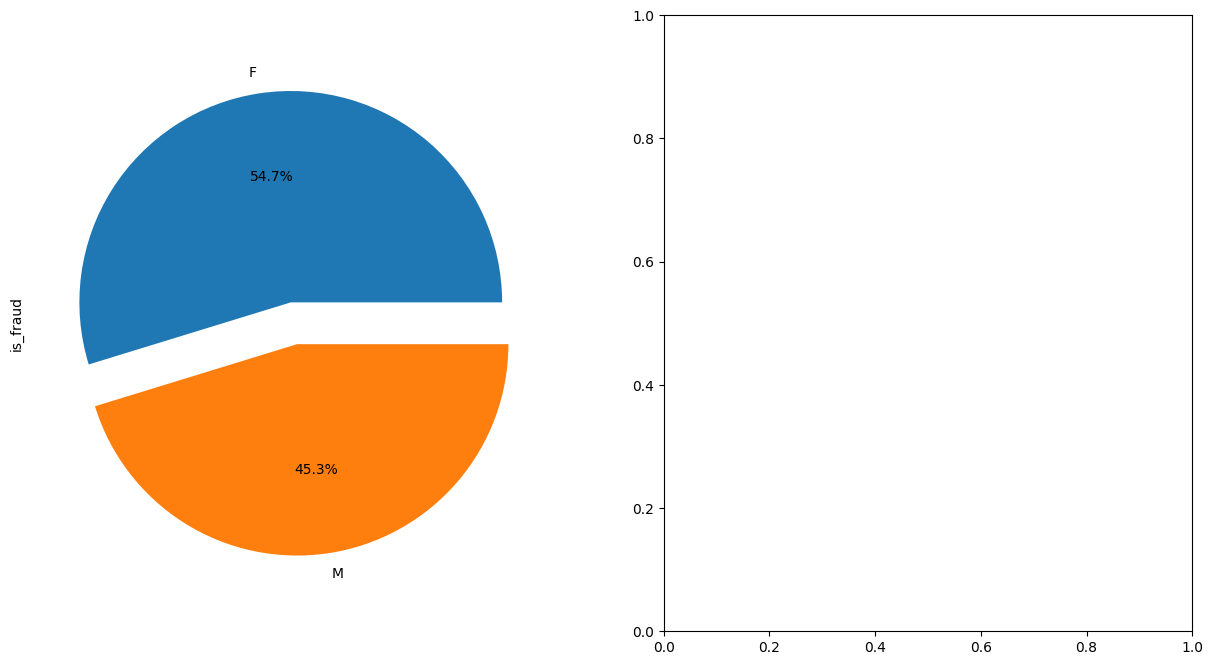

In [ ]:
fig,axb = plt.subplots(ncols=2,nrows=1,figsize=(15, 8))
explode = [0.1, 0.1]
train_dt.groupby('gender')['is_fraud'].count().plot.pie(explode=explode, autopct="%1.1f%%",ax=axb[0]);
plt.show()

male more fraud

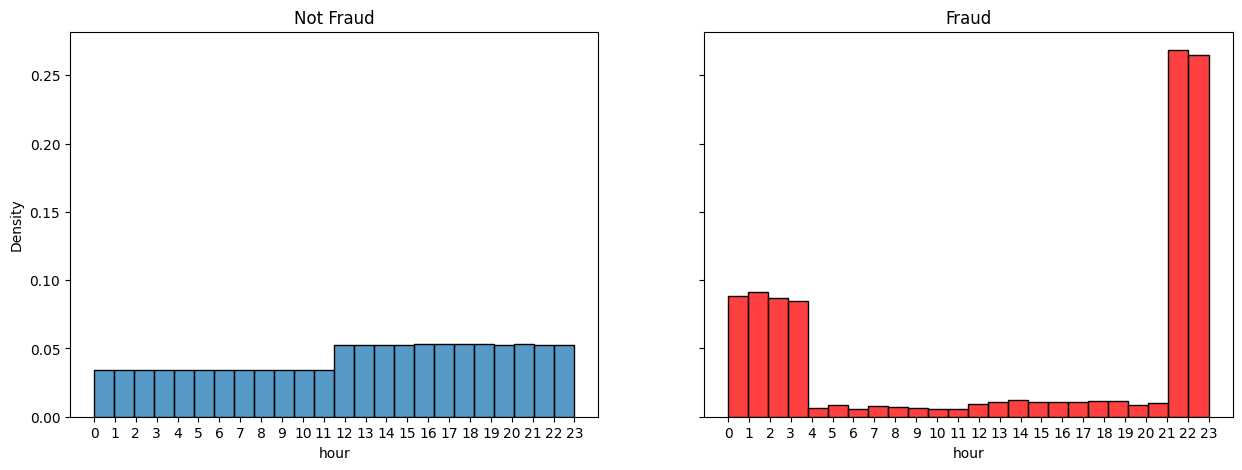

In [ ]:
train_dt['hour'] = pd.to_datetime(train_dt['trans_time']).dt.hour
test_dt['hour'] = pd.to_datetime(test_dt['trans_time']).dt.hour

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5), sharey=True)

ax1 = sns.histplot(x='hour', data=train_dt[train_dt["is_fraud"] == 0],
                   stat="density", bins=24, ax=ax1)

ax2 = sns.histplot(x='hour', data=train_dt[train_dt["is_fraud"] == 1],
                   stat="density", bins=24, ax=ax2, color="red")

ax1.set_title("Not Fraud")
ax2.set_title("Fraud")

ax1.set_xticks(np.arange(24))
ax2.set_xticks(np.arange(24));

more at night

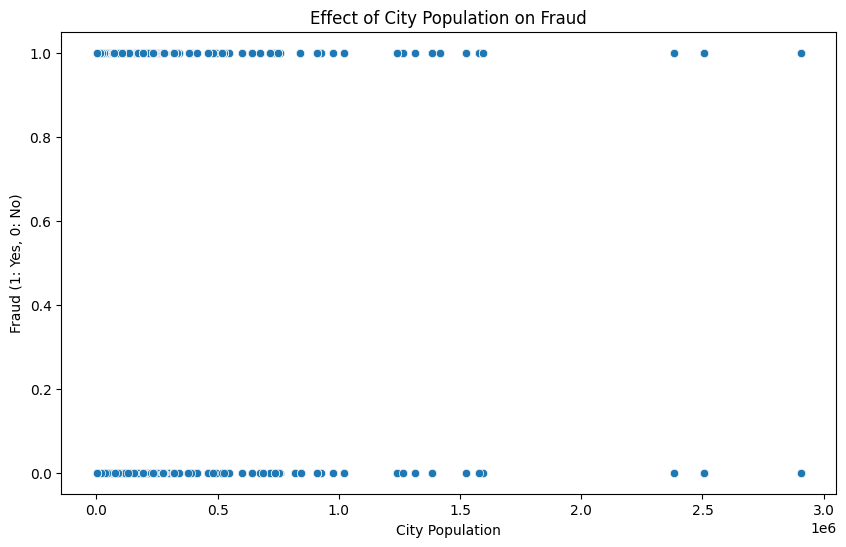

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_dt, x='city_pop', y='is_fraud')
plt.title('Effect of City Population on Fraud')
plt.xlabel('City Population')
plt.ylabel('Fraud (1: Yes, 0: No)')
plt.show()

In [ ]:
train_dt.head(2)


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,trans_time,hour
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2019-01-01,00:00:18,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019-01-01,00:00:44,0


In [ ]:
test_dt.head(2)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,trans_time,hour
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,2020-06-21,12:14:25,12
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,2020-06-21,12:14:33,12


In [ ]:
train_dt.info()
test_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 26 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

concerting all data types to float int

In [ ]:

train_dt['age'] = dt.date.today().year - pd.to_datetime(train_dt['dob']).dt.year

test_dt['age'] = dt.date.today().year - pd.to_datetime(test_dt['dob']).dt.year


In [ ]:
train_dt.info()
test_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 27 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [ ]:
drop_col=['merchant','first', 'street', 'city', 'state', 'zip','trans_date_trans_time','merch_lat','merch_long','trans_num','trans_date','trans_time']
train_dt.drop(columns=drop_col,inplace=True)
test_dt.drop(columns=drop_col,inplace=True)


In [ ]:
train_dt.info()
test_dt.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 15 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   Unnamed: 0  1296675 non-null  int64  
 1   cc_num      1296675 non-null  int64  
 2   category    1296675 non-null  object 
 3   amt         1296675 non-null  float64
 4   last        1296675 non-null  object 
 5   gender      1296675 non-null  object 
 6   lat         1296675 non-null  float64
 7   long        1296675 non-null  float64
 8   city_pop    1296675 non-null  int64  
 9   job         1296675 non-null  object 
 10  dob         1296675 non-null  object 
 11  unix_time   1296675 non-null  int64  
 12  is_fraud    1296675 non-null  int64  
 13  hour        1296675 non-null  int64  
 14  age         1296675 non-null  int64  
dtypes: float64(3), int64(7), object(5)
memory usage: 148.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (

In [ ]:
pip install category_encoders


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.0 MB/s eta 0:00:00


In [ ]:
from category_encoders import TargetEncoder
#Define columns to encode
columns_to_encode = ['category', 'gender', 'job','last']
def target_encode(train, columns, target_col):
    for col in columns:
            X = train[col]
            y = train[target_col]

            new_col_name = f"{col}_encoded"
            target_encoder = TargetEncoder()
            train[new_col_name]=target_encoder.fit_transform(X,y)
    return train
train_dt = target_encode(train_dt, columns_to_encode, 'is_fraud')
test_dt = target_encode(test_dt, columns_to_encode,'is_fraud')



encoding object dtype

In [ ]:
train_dt.head()
train_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 19 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Unnamed: 0        1296675 non-null  int64  
 1   cc_num            1296675 non-null  int64  
 2   category          1296675 non-null  object 
 3   amt               1296675 non-null  float64
 4   last              1296675 non-null  object 
 5   gender            1296675 non-null  object 
 6   lat               1296675 non-null  float64
 7   long              1296675 non-null  float64
 8   city_pop          1296675 non-null  int64  
 9   job               1296675 non-null  object 
 10  dob               1296675 non-null  object 
 11  unix_time         1296675 non-null  int64  
 12  is_fraud          1296675 non-null  int64  
 13  hour              1296675 non-null  int64  
 14  age               1296675 non-null  int64  
 15  category_encoded  1296675 non-null  float64
 16  

In [ ]:
train_dt.drop(columns=['category','gender','job','last','dob'],inplace=True)
test_dt.drop(columns=['category','gender','job','last','dob'],inplace=True)

In [ ]:
train_dt.shape
train_dt.info()
train_dt.head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 14 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Unnamed: 0        1296675 non-null  int64  
 1   cc_num            1296675 non-null  int64  
 2   amt               1296675 non-null  float64
 3   lat               1296675 non-null  float64
 4   long              1296675 non-null  float64
 5   city_pop          1296675 non-null  int64  
 6   unix_time         1296675 non-null  int64  
 7   is_fraud          1296675 non-null  int64  
 8   hour              1296675 non-null  int64  
 9   age               1296675 non-null  int64  
 10  category_encoded  1296675 non-null  float64
 11  gender_encoded    1296675 non-null  float64
 12  job_encoded       1296675 non-null  float64
 13  last_encoded      1296675 non-null  float64
dtypes: float64(7), int64(7)
memory usage: 138.5 MB


<bound method NDFrame.head of          Unnamed: 0               cc_num     amt      lat      long  city_pop  \
0                 0     2703186189652095    4.97  36.0788  -81.1781      3495   
1                 1         630423337322  107.23  48.8878 -118.2105       149   
2                 2       38859492057661  220.11  42.1808 -112.2620      4154   
3                 3     3534093764340240   45.00  46.2306 -112.1138      1939   
4                 4      375534208663984   41.96  38.4207  -79.4629        99   
...             ...                  ...     ...      ...       ...       ...   
1296670     1296670       30263540414123   15.56  37.7175 -112.4777       258   
1296671     1296671     6011149206456997   51.70  39.2667  -77.5101       100   
1296672     1296672     3514865930894695  105.93  32.9396 -105.8189       899   
1296673     1296673     2720012583106919   74.90  43.3526 -102.5411      1126   
1296674     1296674  4292902571056973207    4.30  45.8433 -113.8748       218  

In [ ]:
test_dt.shape
test_dt.info()
test_dt.head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        555719 non-null  int64  
 1   cc_num            555719 non-null  int64  
 2   amt               555719 non-null  float64
 3   lat               555719 non-null  float64
 4   long              555719 non-null  float64
 5   city_pop          555719 non-null  int64  
 6   unix_time         555719 non-null  int64  
 7   is_fraud          555719 non-null  int64  
 8   hour              555719 non-null  int64  
 9   age               555719 non-null  int64  
 10  category_encoded  555719 non-null  float64
 11  gender_encoded    555719 non-null  float64
 12  job_encoded       555719 non-null  float64
 13  last_encoded      555719 non-null  float64
dtypes: float64(7), int64(7)
memory usage: 59.4 MB


<bound method NDFrame.head of         Unnamed: 0            cc_num     amt      lat      long  city_pop  \
0                0  2291163933867244    2.86  33.9659  -80.9355    333497   
1                1  3573030041201292   29.84  40.3207 -110.4360       302   
2                2  3598215285024754   41.28  40.6729  -73.5365     34496   
3                3  3591919803438423   60.05  28.5697  -80.8191     54767   
4                4  3526826139003047    3.19  44.2529  -85.0170      1126   
...            ...               ...     ...      ...       ...       ...   
555714      555714    30560609640617   43.77  40.4931  -91.8912       519   
555715      555715  3556613125071656  111.84  29.0393  -95.4401     28739   
555716      555716  6011724471098086   86.88  46.1966 -118.9017      3684   
555717      555717     4079773899158    7.99  44.6255 -116.4493       129   
555718      555718  4170689372027579   38.13  35.6665  -97.4798    116001   

         unix_time  is_fraud  hour  age  cate

In [ ]:
X = train_dt.drop('is_fraud', axis=1)  # Features
X_t=test_dt.drop('is_fraud', axis=1)
y = train_dt['is_fraud']  # Target variable

X_train, X_test, y_train, y_test =X, X_t,y,test_dt['is_fraud']


model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')
print('\nClassification Report:\n', classification_report(y_test, predictions))

Accuracy: 0.993185404853892

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.24      0.35      0.29      2145

    accuracy                           0.99    555719
   macro avg       0.62      0.67      0.64    555719
weighted avg       0.99      0.99      0.99    555719



In [ ]:
#prediction on entire dataset

test_dt['Predicted'] = predictions

comparison_df = pd.DataFrame({
    'Actual': test_dt['is_fraud'],
    'Predicted': test_dt['Predicted']
})

print(comparison_df.head(10))


   Actual  Predicted
0       0          0
1       0          0
2       0          0
3       0          0
4       0          0
5       0          0
6       0          0
7       0          0
8       0          0
9       0          0
